In [2]:
import pandas as pd


In [3]:

nucleus_data = pd.read_csv('to yuru/MyExpt_FilteredNuclei_nei_annotated_additional_corresponding_cell.csv')
membrane_data = pd.read_csv('to yuru/MyExpt_FilteredCells_with_annotation_additional_corresponding_cell.csv')

In [4]:
nucleus_data.columns = list(nucleus_data.columns[:4]) + ['Nue.' + col for col in nucleus_data.columns[4:]]
membrane_data.columns = list(membrane_data.columns[:3]) + ['Memb.' + col for col in membrane_data.columns[3:]]



In [5]:
print(nucleus_data)

     ImageNumber  ObjectNumber Annotation  Cell_objectnumber  \
0              1             1        NaN                NaN   
1              1             2        NaN                NaN   
2              1             3        NaN                NaN   
3              1             4          M                1.0   
4              1             5        NaN                2.0   
..           ...           ...        ...                ...   
160            5            13        NaN               13.0   
161            5            14        NaN               14.0   
162            5            15        NaN               15.0   
163            5            16        NaN               16.0   
164            5            17        NaN               17.0   

     Nue.AreaShape_Area  Nue.AreaShape_BoundingBoxArea  \
0                  1542                           1904   
1                  1219                           1770   
2                  1615                           2268   

In [6]:
combined_data = pd.merge(nucleus_data, membrane_data, 
                         left_on=['ImageNumber', 'Cell_objectnumber'],  # 需要引号
                         right_on=['ImageNumber', 'ObjectNumber'],  # 确保右侧也正确命名
                         how='left')

# 查看合并后的数据
print(combined_data.head())


   ImageNumber  ObjectNumber_x Annotation  Cell_objectnumber  \
0            1               1        NaN                NaN   
1            1               2        NaN                NaN   
2            1               3        NaN                NaN   
3            1               4          M                1.0   
4            1               5        NaN                2.0   

   Nue.AreaShape_Area  Nue.AreaShape_BoundingBoxArea  \
0                1542                           1904   
1                1219                           1770   
2                1615                           2268   
3                1934                           3003   
4                1181                           1786   

   Nue.AreaShape_BoundingBoxMaximum_X  Nue.AreaShape_BoundingBoxMaximum_Y  \
0                                2198                                  44   
1                                2127                                  46   
2                                1359          

In [7]:

# 保存合并后的数据到新文件
combined_data.to_csv('Desktop/che-snagrath/Single cell NK/combined_data.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'Desktop/che-snagrath/Single cell NK'

In [ ]:

E_nucleus_data = pd.read_csv('to yuru/E.csv')
E_membrane_data = pd.read_csv('to yuru/E_memb.csv')
E_nucleus_data.columns = list(E_nucleus_data.columns[:4]) + ['Nue.' + col for col in E_nucleus_data.columns[4:]]
E_membrane_data.columns = list(E_membrane_data.columns[:3]) + ['Memb.' + col for col in E_membrane_data.columns[3:]]

E_combined_data = pd.merge(E_nucleus_data, E_membrane_data, 
                         left_on=['ImageNumber', 'Cell_objectnumber'],  # 需要引号
                         right_on=['ImageNumber', 'ObjectNumber'],  # 确保右侧也正确命名
                         how='left')

# 查看合并后的数据
print(E_combined_data.head())

In [8]:
E_combined_data.to_csv('E_combined_data.csv', index=False)


NameError: name 'E_combined_data' is not defined

In [14]:
combined_data = pd.read_csv('combined_data.csv')

In [21]:
print(combined_data.columns == E_combined_data.columns)


[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [23]:
import pandas as pd

# 假设 combined_data 和 E_combined_data 已经存在

# 获取列名
combined_columns = combined_data.columns.tolist()
E_combined_columns = E_combined_data.columns.tolist()

# 找到不匹配的列名
mismatched_columns = [col for col in combined_columns if col not in E_combined_columns]
print("In combined_data but not in E_combined_data:", mismatched_columns)

# 也可以检查在 E_combined_data 中而不在 combined_data 中的列
missing_in_combined_data = [col for col in E_combined_columns if col not in combined_columns]
print("In E_combined_data but not in combined_data:", missing_in_combined_data)



In combined_data but not in E_combined_data: ['Annotation', 'Unnamed: 2']
In E_combined_data but not in combined_data: ['Annotation_x', 'Annotation_y']


In [24]:
import pandas as pd

# 假设 combined_data 和 E_combined_data 已经存在

# 重命名 E_combined_data 的列，去掉后缀
E_combined_data = E_combined_data.rename(columns={
    'Annotation_x': 'Annotation',
    'Annotation_y': 'Unnamed: 2'
})

# 合并数据
final_combined_data = pd.concat([combined_data, E_combined_data], ignore_index=True)

# 查看合并后的数据
print(final_combined_data.head())

# 保存合并后的数据
final_combined_data.to_csv('final_combined_data.csv', index=False)


   ImageNumber  ObjectNumber_x Annotation  Cell_objectnumber  \
0            1               1        NaN                NaN   
1            1               2        NaN                NaN   
2            1               3        NaN                NaN   
3            1               4          M                1.0   
4            1               5        NaN                2.0   

   Nue.AreaShape_Area  Nue.AreaShape_BoundingBoxArea  \
0                1542                           1904   
1                1219                           1770   
2                1615                           2268   
3                1934                           3003   
4                1181                           1786   

   Nue.AreaShape_BoundingBoxMaximum_X  Nue.AreaShape_BoundingBoxMaximum_Y  \
0                                2198                                  44   
1                                2127                                  46   
2                                1359          

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/sklearn/base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/sw/pkgs/arc/python3.11-anaconda/2024.02-1/lib/python3.11/site-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [1]:

import pandas as pd
import sklearn

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

print(pd.__version__)  # 输出 pandas 版本
print(sklearn.__version__)  # 输出 scikit-learn 版本


2.1.4
1.2.2


In [31]:
# 删除 Annotation 列中的缺失值
final_combined_data = final_combined_data[final_combined_data['Annotation'].notna()]

In [34]:
print(final_combined_data)
final_combined_data.to_csv('filter_final_combined_data.csv', index=False)
# edit myself, remove location and some object # info and Nah info
final_combined_data = pd.read_csv('filter_final_combined_data.csv')

     ImageNumber  ObjectNumber_x Annotation  Cell_objectnumber  \
3              1               4          M                1.0   
6              1               7          M                3.0   
7              1               8          M                4.0   
11             1              12          M                8.0   
14             1              15          M               11.0   
..           ...             ...        ...                ...   
432            8              18          M               18.0   
435            8              21          M               21.0   
440            8              26          M               26.0   
458            8              44          M               43.0   
462            8              48          M               47.0   

     Nue.AreaShape_Area  Nue.AreaShape_BoundingBoxArea  \
3                  1934                           3003   
6                  1783                           2262   
7                  1776          

In [9]:
final_combined_data = pd.read_csv('filter_final_combined_data.csv')

In [38]:
print("Checking for NaN values in features:")
print(sum(final_combined_data.isna().sum()))  # 输出每列的 NaN 值数量

Checking for NaN values in features:
810


In [33]:
# 选择特征列和目标变量
features = final_combined_data.filter(regex='^(Neu\.|Memb\.)').columns
X = final_combined_data[features]

# 选择 Annotation 列作为目标变量
y = final_combined_data['Annotation']

# 进行训练和测试数据的拆分（80/20）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)

# 交叉验证
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)  # 5折交叉验证
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# 在训练集上训练模型
dt_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = dt_classifier.predict(X_test)

# 输出分类报告
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.95454545 0.95454545 1.         1.         0.9047619 ]
Mean CV score: 0.9627705627705628
              precision    recall  f1-score   support

           E       1.00      0.92      0.96        12
           M       0.94      1.00      0.97        15

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



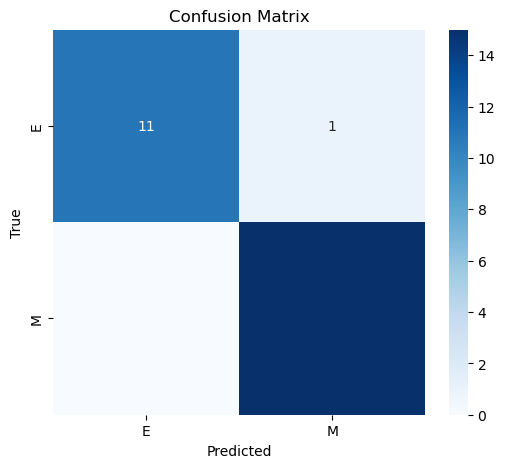

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred, labels=['E', 'M'])

# 绘制混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['E', 'M'], yticklabels=['E', 'M'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


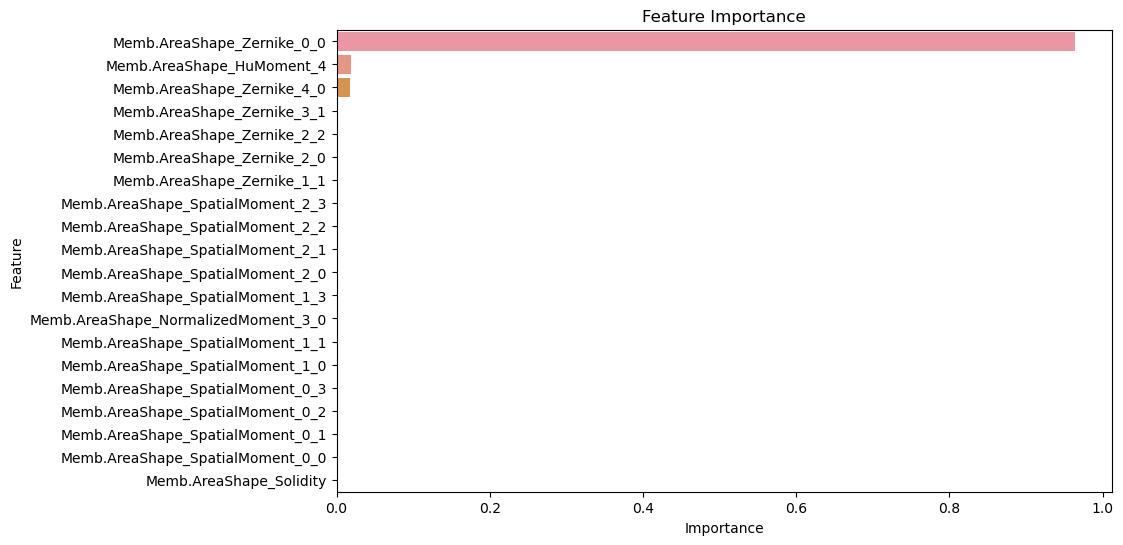

In [43]:
# 计算特征重要性
importance = dt_classifier.feature_importances_

# 创建特征与其重要性的 DataFrame
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))  # 展示前20个重要特征
plt.title('Feature Importance')
plt.show()


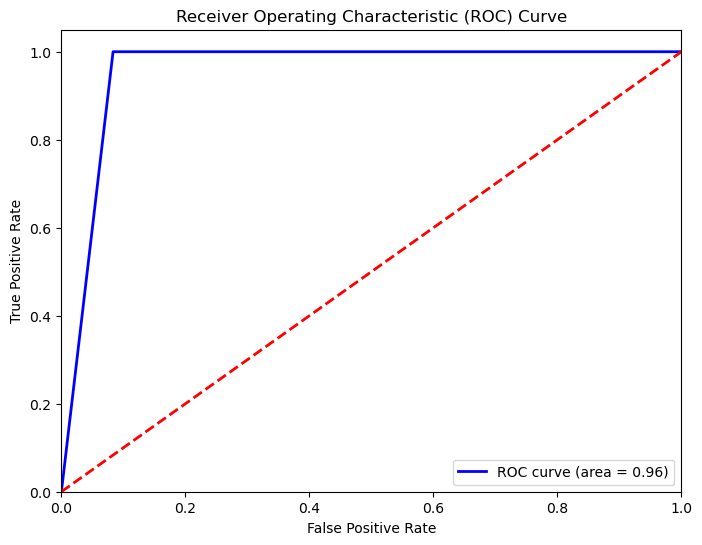

In [44]:
from sklearn.metrics import roc_curve, auc

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1], pos_label='M')
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


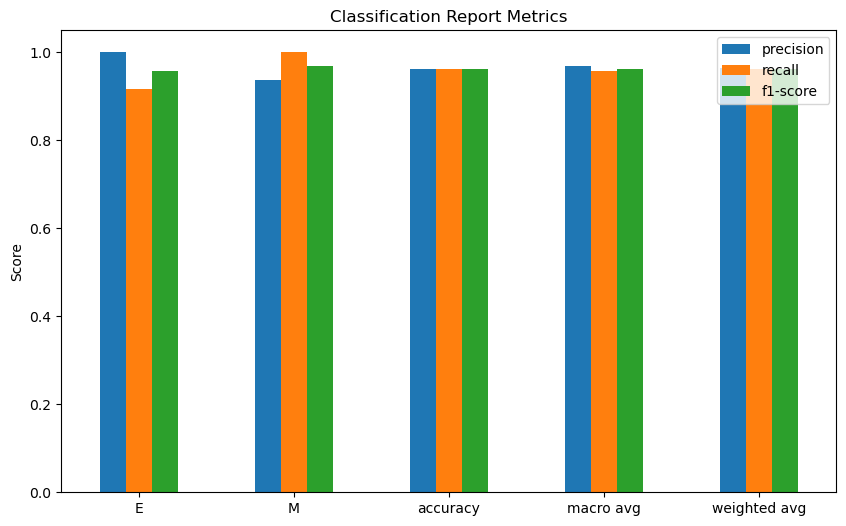

In [45]:
from sklearn.metrics import classification_report

# 生成分类报告
report = classification_report(y_test, y_pred, output_dict=True)

# 转换为DataFrame
report_df = pd.DataFrame(report).transpose()

# 绘制条形图
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


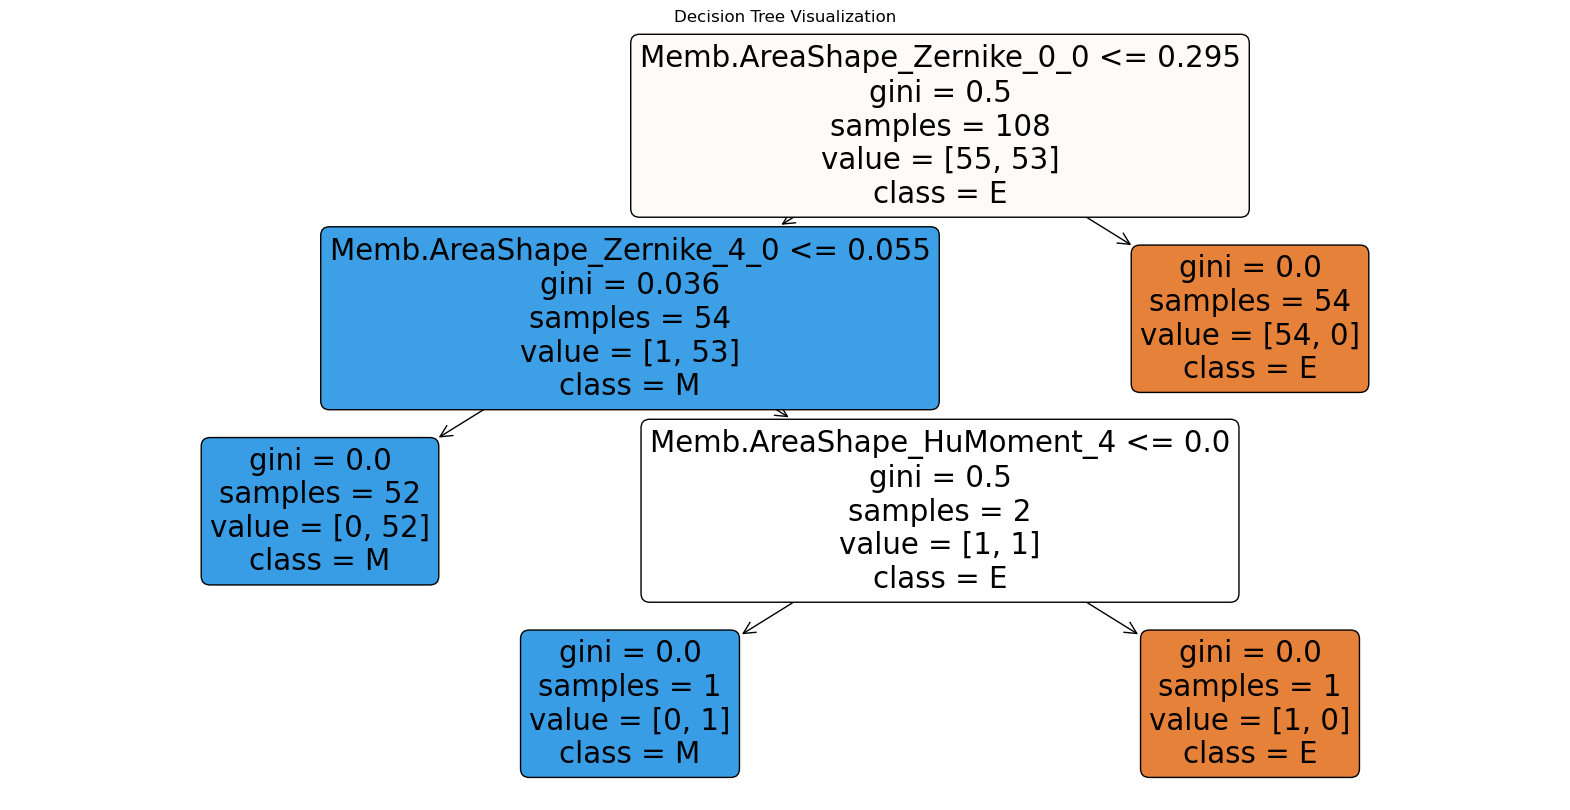

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot
plot_tree(dt_classifier, feature_names=features, class_names=['E', 'M'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [10]:
# Get prediction probabilities
y_pred_proba = dt_classifier.predict_proba(X_test)

# The probabilities are returned in a 2D array, with one probability per class (E, M) per sample
# For example, y_pred_proba[:, 0] is the probability for class 'E' and y_pred_proba[:, 1] is for 'M'

# Create a DataFrame with the probabilities and predictions
predictions_with_confidence = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_pred,
    'Confidence_E': y_pred_proba[:, 0],  # Confidence for class 'E'
    'Confidence_M': y_pred_proba[:, 1]   # Confidence for class 'M'
})

# Optionally, you can add the highest confidence score as a new column
predictions_with_confidence['Max_Confidence'] = predictions_with_confidence[['Confidence_E', 'Confidence_M']].max(axis=1)

# Display the predictions with confidence scores
print(predictions_with_confidence)


    True_Label Predicted_Label  Confidence_E  Confidence_M  Max_Confidence
98           E               E           1.0           0.0             1.0
67           E               E           1.0           0.0             1.0
105          E               E           1.0           0.0             1.0
19           M               M           0.0           1.0             1.0
42           E               E           1.0           0.0             1.0
62           E               E           1.0           0.0             1.0
12           M               M           0.0           1.0             1.0
110          M               M           0.0           1.0             1.0
125          M               M           0.0           1.0             1.0
128          M               M           0.0           1.0             1.0
44           E               E           1.0           0.0             1.0
40           M               M           0.0           1.0             1.0
27           M           

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming your data is in X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Now predict probabilities
y_prob = clf.predict_proba(X_test)

# You can now use this to assign scores to your test set
test_data_with_scores = X_test.copy()
test_data_with_scores['E_prob'] = y_prob[:, 0]  # Probability of class 'E'
test_data_with_scores['M_prob'] = y_prob[:, 1]  # Probability of class 'M'

# Define a custom EM score, for example by taking the difference between the two probabilities
test_data_with_scores['EM_score'] = test_data_with_scores['M_prob'] - test_data_with_scores['E_prob']

# Display the results
print(test_data_with_scores['EM_score'])


98    -1.0
67    -1.0
105   -1.0
19     1.0
42    -1.0
62    -1.0
12     1.0
110    1.0
125    1.0
128    1.0
44    -1.0
40     1.0
27     1.0
100   -1.0
119    1.0
31     1.0
51    -1.0
4      1.0
84     1.0
81    -1.0
85    -1.0
26     1.0
16     1.0
18     1.0
10    -1.0
111    1.0
45    -1.0
Name: EM_score, dtype: float64


In [10]:
# Get feature importances from the trained decision tree model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate features with their importance
feature_weights = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
})

# Normalize the importance values so they can be used as weights (summing to 1)
feature_weights['Weight'] = feature_weights['Importance'] / feature_weights['Importance'].sum()

print(feature_weights)

# Create a DataFrame with the test data, true labels (annotations), and custom scores
test_data_with_scores = pd.DataFrame(X_test, columns=X_train.columns)

# Calculate the custom score based on the weighted sum of the important features
test_data_with_scores['Custom_EM_Score'] = (X_test * feature_weights['Weight'].values).sum(axis=1)

# Add the true annotation (y_test) to the DataFrame
test_data_with_scores['True_Annotation'] = y_test.values

# Display the DataFrame with the custom scores and annotations
print(test_data_with_scores[['Custom_EM_Score', 'True_Annotation']])



NameError: name 'clf' is not defined

In [36]:
feature_weights.to_csv('feature_weights.csv', index=False)
test_data_with_scores[['Custom_EM_Score', 'True_Annotation']].to_csv('test_data_with_scores.csv', index=False)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 选择特征列
features = final_combined_data.filter(regex='^(Neu\.|Memb\.)').columns
X = final_combined_data[features]

# 选择 Annotation 列作为目标变量，并只保留 'E' 和 'M'
y = final_combined_data['Annotation'].dropna()
X = X.loc[y.index]  # 确保 X 的索引与 y 一致

# 进行训练和测试数据的拆分（80/20）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建逻辑回归模型，调整类别权重
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# 在训练集上训练模型
log_reg.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = log_reg.predict(X_test_scaled)

# 输出分类报告和混淆矩阵
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           E       1.00      1.00      1.00        12
           M       1.00      1.00      1.00        15

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

[[12  0]
 [ 0 15]]


In [51]:
# 计算每个样本属于 E 的概率
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # 取 E 类别的概率
A = pd.DataFrame(X_test, columns=X_train.columns)
A['EM_Score'] = y_probs
A['True_Annotation'] = y_test.values
print(A[['EM_Score', 'True_Annotation']])

A[['EM_Score', 'True_Annotation']].to_csv('logical_test_data_with_scores.csv', index=False)

     EM_Score True_Annotation
98   0.010232               E
67   0.000907               E
105  0.000056               E
19   0.995268               M
42   0.001522               E
62   0.000473               E
12   1.000000               M
110  0.999975               M
125  0.996874               M
128  0.996232               M
44   0.000655               E
40   0.995202               M
27   0.999998               M
100  0.052266               E
119  0.984777               M
31   0.985259               M
51   0.019513               E
4    0.996619               M
84   0.401349               E
81   0.000014               E
85   0.010679               E
26   1.000000               M
16   0.998234               M
18   0.995637               M
10   0.713524               M
111  0.990204               M
45   0.012674               E


In [4]:
import joblib

# 保存模型到文件
joblib.dump(log_reg, '100824logistic_regression_model.pkl')

# 保存标准化器
joblib.dump(scaler, '100824scaler.pkl')


['100824scaler.pkl']

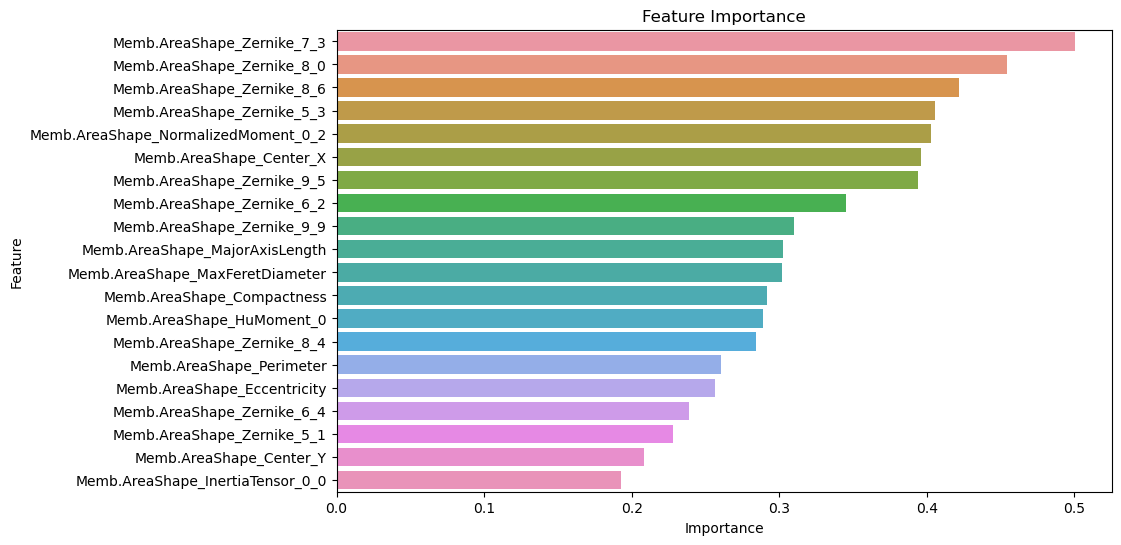

Confusion Matrix:
[[12  0]
 [ 0 15]]
              precision    recall  f1-score   support

           E       1.00      1.00      1.00        12
           M       1.00      1.00      1.00        15

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



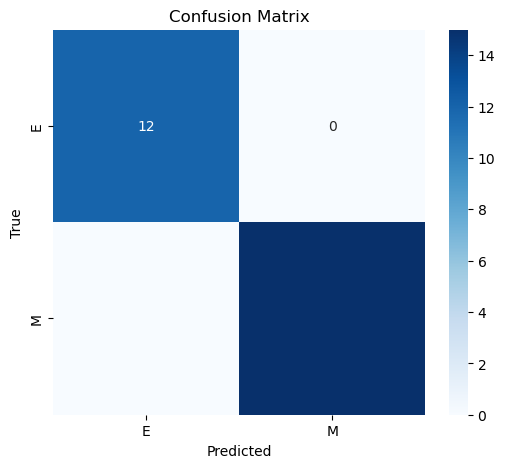

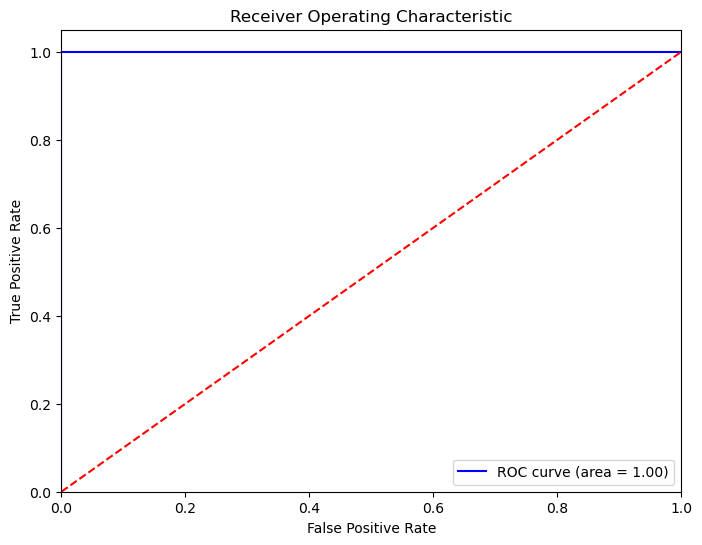

In [58]:
#再来一遍

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# 选择特征列
features = final_combined_data.filter(regex='^(Neu\.|Memb\.)').columns
X = final_combined_data[features]

# 选择 Annotation 列作为目标变量，并只保留 'E' 和 'M'
y = final_combined_data['Annotation'].dropna()
X = X.loc[y.index]  # 确保 X 的索引与 y 一致

# 进行训练和测试数据的拆分（80/20）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建逻辑回归模型，调整类别权重
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# 在训练集上训练模型
log_reg.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # 预测为正类的概率

# 计算特征重要性
importance = log_reg.coef_[0]  # 获取权重
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))  # 展示前20个重要特征
plt.title('Feature Importance')
plt.show()

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 输出分类报告
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['E', 'M'], yticklabels=['E', 'M'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='M')  # 使用 'M' 作为正类
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 线性参考
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



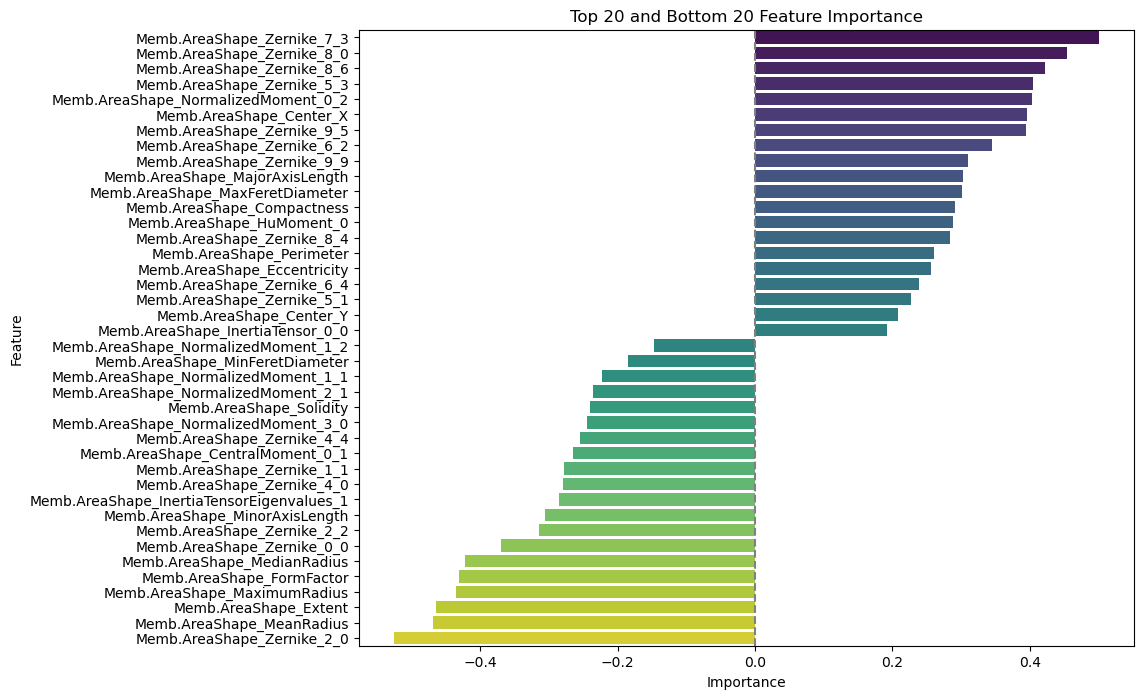

In [59]:
# 计算特征重要性
importance = log_reg.coef_[0]  # 获取权重
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 提取前20个和后20个特征
top_20 = feature_importance.head(20)
bottom_20 = feature_importance.tail(20)

# 合并前20个和后20个特征以便于绘图
combined_importance = pd.concat([top_20, bottom_20]).reset_index(drop=True)

# 绘制特征重要性图
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=combined_importance, palette='viridis')
plt.title('Top 20 and Bottom 20 Feature Importance')
plt.axvline(0, color='grey', linestyle='--')  # 在0处绘制分隔线
plt.show()

Mean Squared Error: 474462520.87649506
R^2 Score: -1921573208.5498047


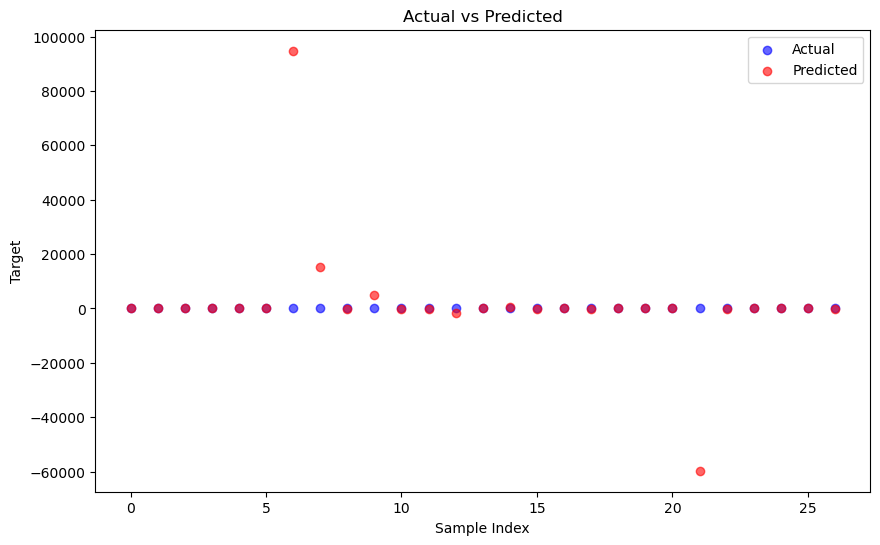

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 示例数据
features = final_combined_data.filter(regex='^(Neu\.|Memb\.)').columns
X = final_combined_data[features]
y = final_combined_data['Annotation']  # 替换为你的目标变量



# 检查目标变量的类型，并进行编码
if y.dtype == 'object':  # 如果目标变量是字符串
    le = LabelEncoder()
    y = le.fit_transform(y)  # 将 'E' 和 'M' 转换为数值型

# 拆分训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建多项式特征（这里以2次多项式为例）
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 进行预测
y_pred = model.predict(X_test_poly)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 确保绘图时的 x 和 y 长度一致
plt.figure(figsize=(10, 6))

# 绘制真实值和预测值的散点图
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.legend()
plt.show()


NameError: name 'log_reg' is not defined

In [46]:
#if i use less feature in decission tree
final_combined_data = pd.read_csv('lessfeature_filter_final_combined_data.csv')
# 选择特征列和目标变量
features = final_combined_data.filter(regex='^(Neu\.|Memb\.)').columns
X = final_combined_data[features]

# 选择 Annotation 列作为目标变量
y = final_combined_data['Annotation']

# 进行训练和测试数据的拆分（80/20）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树分类器
dt_classifier = DecisionTreeClassifier(random_state=42)

# 交叉验证
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)  # 5折交叉验证
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# 在训练集上训练模型
dt_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = dt_classifier.predict(X_test)

# 输出分类报告
print(classification_report(y_test, y_pred))

Cross-validation scores: [1.         0.95454545 1.         1.         0.85714286]
Mean CV score: 0.9623376623376624
              precision    recall  f1-score   support

           E       0.92      0.92      0.92        12
           M       0.93      0.93      0.93        15

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.93      0.93      0.93        27



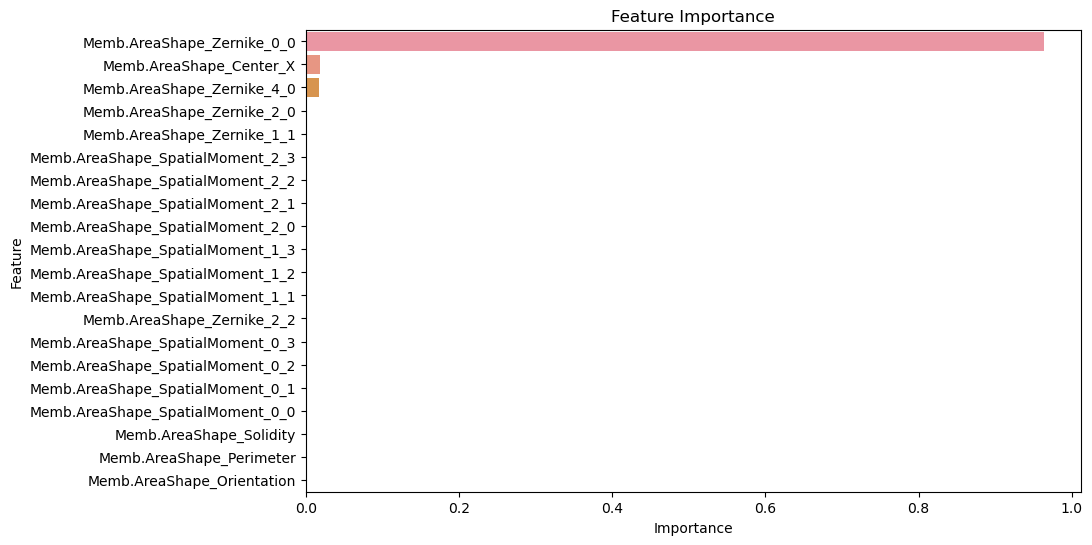

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix# 计算特征重要性
importance = dt_classifier.feature_importances_

# 创建特征与其重要性的 DataFrame
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))  # 展示前20个重要特征
plt.title('Feature Importance')
plt.show()


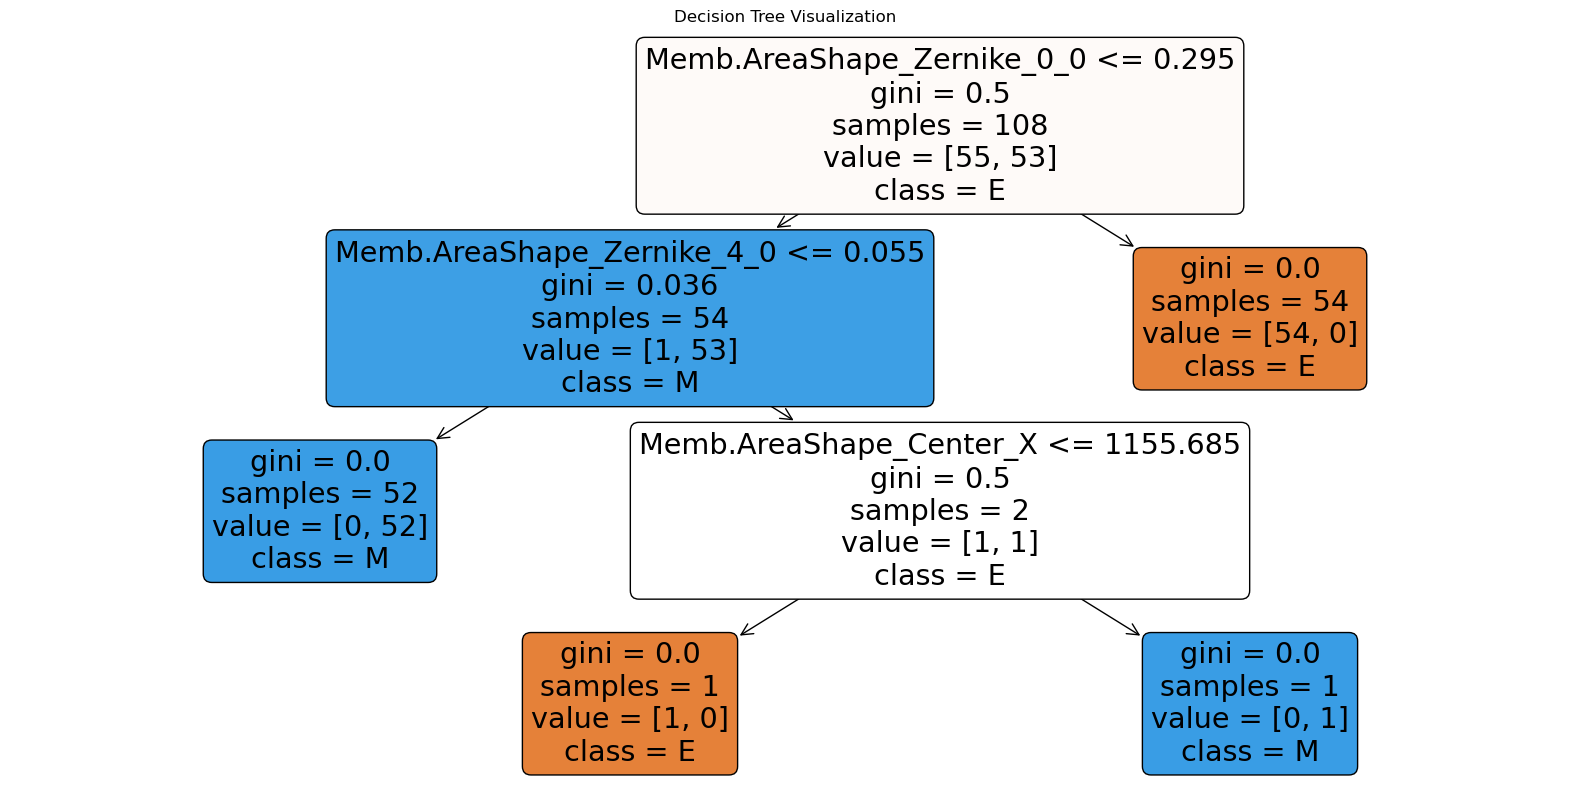

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot
plot_tree(dt_classifier, feature_names=features, class_names=['E', 'M'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()